In [1]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf

# Data generating

In [16]:
price_at = lambda x : np.sin(x)
price_at(10)

-0.5440211108893698

In [17]:
X = [x/10 for x in range(0,1000)]
Y = np.array(list(map(price_at, X)))

DATA_FRAME = pd.DataFrame(index=X, data={'price': Y})
DATA_FRAME

,price
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
99.5,-0.857795
99.6,-0.802196
99.7,-0.738582
99.8,-0.667588


<AxesSubplot: >

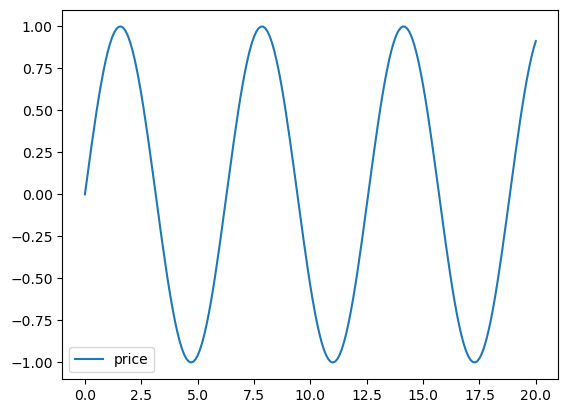

In [18]:
DATA_FRAME[:20].plot()

# Environment

In [50]:
class StockMarket:
    def __init__(self, price_generator, period = 0.1):
        self._price_generator = price_generator
        self._current_time = 0
        self._period = period
        
    def next_time(self):
        self._current_time += self._period
        
    def get_current_price(self):
        return self._price_generator(self._current_time)
    
    def get_price_at(self, time):
        return self._price_generator(time)
    
class Entry:
    def __init__(self, ticker, entry_price, volume):
        self.ticker = ticker
        self.entry_price = entry_price
        self.volume = volume

class TradingPlatform:
    def __init__(self, stock_market: StockMarket, deposit: float):
        self._stock_market = stock_market
        self._deposit = deposit
        self._wallet = []
        
    def buy(self, ticker, volume):
        price = self._stock_market.get_current_price()
        if (price * volume < self._deposit):
            raise Exception("No enough deposit")
        self._wallet.append(Entry('USDPLN', price, volume))
        self._deposit -= price * volume
        
    def sell(self):
        
        
    

ENVIRONMENT = TradingPlatform(stock_market=StockMarket(price_generator = np.sin), deposit=1000.0)

# Model

In [35]:
MODEL = tf.keras.Sequential([
    tf.keras.layers.Input(shape=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Softmax()
])

MODEL.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 re_lu_2 (ReLU)              (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
 softmax_2 (Softmax)         (None, 2)                 0         
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


0.09983341664682815